In [1]:
import pandas as pd
import sqlite3
import os
import csv
from itertools import groupby
import numpy as np

import matplotlib.pyplot as plt

plt.style.use("ggplot")

WithDbFileDelete = True

dbfile = "GasElectricUsage.db"

# create the sqlite DB
db = sqlite3.connect(dbfile)

# read CSV into dataframe
df1 = pd.read_csv("Usage_History_2019-2020.csv")

# convert the pandas dataframe to a sqlite table
df1.to_sql("GasElectricUsage", db, if_exists="replace")

def run_query(query):
    return pd.read_sql_query(query,db)

os.getcwd()

'C:\\Users\\GiGi\\repos\\FinalProject'

In [2]:
df1

,Contract,Date,Read_Date,Usage,Read_Type,Billed_Amt,Days_Billed,Avg_Temp,Rate
0,1111349,Mar 2020,04/03/2020,247,Company-Read,37.67,28,39.96,Residential Electric Service
1,1111349,Feb 2020,05/02/2020,368,Company-Read,49.80,28,41.79,Residential Electric Service
2,1111349,Jan 2020,08/01/2020,659,Company-Read,80.51,34,43.32,Residential Electric Service
3,1111349,Dec 2019,05/12/2019,760,Company-Read,86.49,31,42.16,Residential Electric Service
4,1111349,Nov 2019,04/11/2019,503,Company-Read,61.71,32,56.53,Residential Electric Service
...,...,...,...,...,...,...,...,...,...
67,1111367,Aug 2017,08/08/2017,18,Company-Read,32.08,29,79.59,Residential Gas Service
68,1111367,Jul 2017,10/07/2017,20,Company-Read,34.67,32,77.34,Residential Gas Service
69,1111367,Jun 2017,08/06/2017,26,Company-Read,39.49,34,70.53,Residential Gas Service
70,1111367,May 2017,05/05/2017,28,Company-Read,40.79,30,65.33,Residential Gas Service


In [3]:
# query to show us what tables exist in DB
query = """
SELECT * 
FROM sqlite_master
ORDER BY name;
"""
run_query(query)

,type,name,tbl_name,rootpage,sql
0,table,GasElectricUsage,GasElectricUsage,2,"CREATE TABLE ""GasElectricUsage"" (\n""index"" INT..."
1,table,GasElectricUsage_cleaned,GasElectricUsage_cleaned,6,CREATE TABLE GasElectricUsage_cleaned(\n Cont...
2,index,ix_GasElectricUsage_index,GasElectricUsage,3,"CREATE INDEX ""ix_GasElectricUsage_index""ON ""Ga..."


In [4]:
query = """
SELECT * 
FROM GasElectricUsage LIMIT 12;
"""
run_query(query)

,index,Contract,Date,Read_Date,Usage,Read_Type,Billed_Amt,Days_Billed,Avg_Temp,Rate
0,0,1111349,Mar 2020,04/03/2020,247,Company-Read,37.67,28,39.96,Residential Electric Service
1,1,1111349,Feb 2020,05/02/2020,368,Company-Read,49.80,28,41.79,Residential Electric Service
2,2,1111349,Jan 2020,08/01/2020,659,Company-Read,80.51,34,43.32,Residential Electric Service
3,3,1111349,Dec 2019,05/12/2019,760,Company-Read,86.49,31,42.16,Residential Electric Service
4,4,1111349,Nov 2019,04/11/2019,503,Company-Read,61.71,32,56.53,Residential Electric Service
5,5,1111349,Oct 2019,03/10/2019,997,Company-Read,106.33,29,77.07,Residential Electric Service
6,6,1111349,Sep 2019,04/09/2019,935,Company-Read,100.58,29,78.14,Residential Electric Service
7,7,1111349,Aug 2019,06/08/2019,1035,Company-Read,114.07,29,79.07,Residential Electric Service
8,8,1111349,Jul 2019,08/07/2019,686,Company-Read,81.65,31,75.74,Residential Electric Service
9,9,1111349,Jun 2019,07/06/2019,524,Company-Read,64.08,30,70.30,Residential Electric Service


In [5]:
c = db.cursor()

Create_TableName = "GasElectricUsage_cleaned"

Create_SQL = f"""
create table if not exists {Create_TableName} as
SELECT
    Rate, 
    Date, 
    Usage, 
    Billed_Amt, 
    Avg_Temp, 
    Read_Type 
FROM
    GasElectricUsage;
"""
c.execute(Create_SQL)

c.close()

GasElectricUsage_cleaned = """
SELECT 
*
FROM
    GasElectricUsage_cleaned;
"""

run_query(GasElectricUsage_cleaned)


,Contract,Date,Usage,Billed_Amt,Avg_Temp,Read_Type
0,1111349,Mar 2020,247,37.67,39.96,Company-Read
1,1111349,Feb 2020,368,49.80,41.79,Company-Read
2,1111349,Jan 2020,659,80.51,43.32,Company-Read
3,1111349,Dec 2019,760,86.49,42.16,Company-Read
4,1111349,Nov 2019,503,61.71,56.53,Company-Read
...,...,...,...,...,...,...
67,1111367,Aug 2017,18,32.08,79.59,Company-Read
68,1111367,Jul 2017,20,34.67,77.34,Company-Read
69,1111367,Jun 2017,26,39.49,70.53,Company-Read
70,1111367,May 2017,28,40.79,65.33,Company-Read


In [6]:
# List highest average temp for Gas Usage from 2017 -2020.
query = """SELECT
    Rate, 
    Date, 
    Usage, 
    Read_Type, 
    Billed_Amt, 
    Avg_temp 
FROM
    GasElectricUsage 
WHERE
    contract = 1111367 
ORDER BY
    Avg_Temp DESC;
"""
run_query(query)

,Rate,Date,Usage,Read_Type,Billed_Amt,Avg_Temp
0,Residential Gas Service,Aug 2017,18,Company-Read,32.08,79.59
1,Residential Gas Service,Sep 2018,15,Company-Read,28.55,79.57
2,Residential Gas Service,Jul 2018,23,Estimate,33.79,79.44
3,Residential Gas Service,Aug 2019,15,Company-Read,31.92,79.07
4,Residential Gas Service,Sep 2019,18,Company-Read,33.12,78.14
5,Residential Gas Service,Aug 2018,8,Company-Read,23.07,77.87
6,Residential Gas Service,Jul 2017,20,Company-Read,34.67,77.34
7,Residential Gas Service,Oct 2019,15,Company-Read,30.96,77.07
8,Residential Gas Service,Jun 2018,22,Estimate,33.07,76.21
9,Residential Gas Service,Sep 2017,16,Company-Read,30.26,75.76


In [7]:
# List both Gas and Electric usage that was estimated instead of company read.
query = """
SELECT
    Rate,
    Date, 
    Usage, 
    Billed_Amt, 
    Avg_Temp, 
    Read_Type 
FROM
    GasElectricUsage 
WHERE 
    Read_Type = "Estimate";
"""
run_query(query)

,Rate,Date,Usage,Billed_Amt,Avg_Temp,Read_Type
0,Residential Electric Service,Jul 2018,955,99.94,79.75,Estimate
1,Residential Gas Service,Jul 2018,23,33.79,79.44,Estimate
2,Residential Gas Service,Jun 2018,22,33.07,76.21,Estimate


In [8]:
# List by date, the highest Electric Usage from 2017 -2020.
query = """
SELECT
    Rate, 
    Date, 
    Usage, 
    Read_Type, 
    Billed_Amt, 
    Avg_Temp 
FROM 
    GasElectricUsage 
WHERE 
    Contract = 1111349
ORDER BY 
    Usage DESC;
"""
run_query(query)

,Rate,Date,Usage,Read_Type,Billed_Amt,Avg_Temp
0,Residential Electric Service,Aug 2018,1746,Company-Read,166.73,77.87
1,Residential Electric Service,Dec 2018,1536,Company-Read,151.43,42.10
2,Residential Electric Service,Jan 2018,1470,Company-Read,160.21,30.79
3,Residential Electric Service,Sep 2018,1163,Company-Read,114.28,79.57
4,Residential Electric Service,Nov 2018,1112,Company-Read,110.65,56.55
5,Residential Electric Service,Aug 2019,1035,Company-Read,114.07,79.07
6,Residential Electric Service,Oct 2019,997,Company-Read,106.33,77.07
7,Residential Electric Service,Feb 2018,984,Company-Read,114.73,36.34
8,Residential Electric Service,Aug 2017,960,Company-Read,105.48,79.59
9,Residential Electric Service,Jul 2018,955,Estimate,99.94,79.75


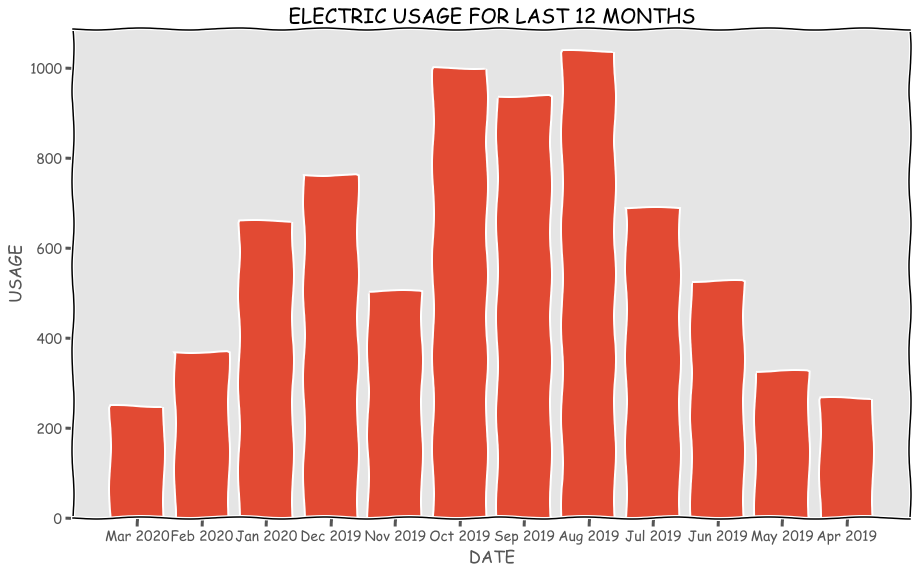

In [24]:
plt.xkcd()
x = df1['Date'].head(12)
data = df1['Usage'].head(12)

plt.figure(figsize= (15,9))
plt.bar (x, data);
plt.title('ELECTRIC USAGE FOR LAST 12 MONTHS')
plt.xlabel('DATE')
plt.ylabel('USAGE')
plt.show()

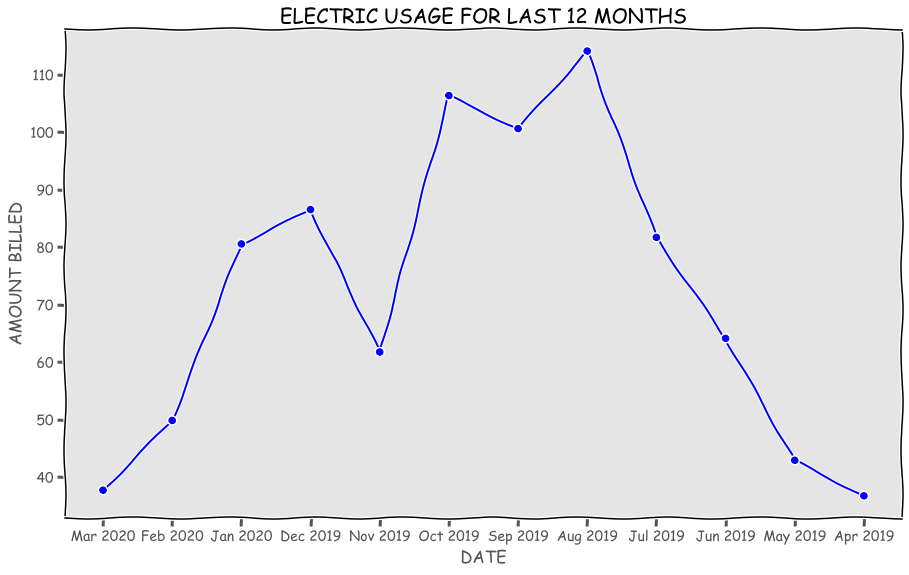

In [43]:
plt.xkcd()
x = df1['Date'].head(12)
data = df1['Billed_Amt'].head(12)

plt.figure(figsize= (15,9))
plt.plot(x, data, color = 'blue', marker = 'o')
plt.title('ELECTRIC USAGE FOR LAST 12 MONTHS')
plt.xlabel('DATE')
plt.ylabel('AMOUNT BILLED')
plt.show()

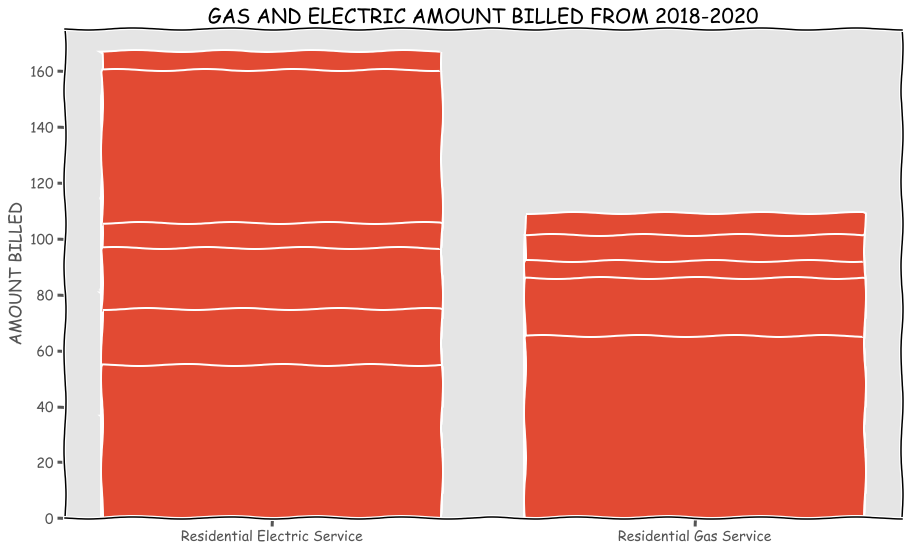

In [68]:
plt.xkcd()
x = df1['Rate'].head(73)
data = df1['Billed_Amt'].head(73)

plt.figure(figsize= (15,9))
plt.bar(x, data)
plt.title('GAS AND ELECTRIC AMOUNT BILLED FROM 2018-2020')
#plt.xlabel('DATE')
plt.ylabel('AMOUNT BILLED')
plt.show()

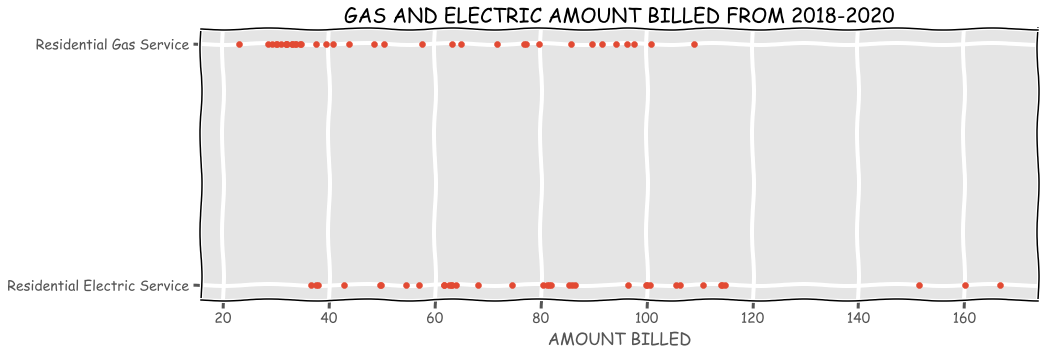

In [77]:

x = df1['Rate'].head(73)
data = df1['Billed_Amt'].head(73)

plt.figure(figsize= (15,5))
plt.scatter(data, x)
plt.title('GAS AND ELECTRIC AMOUNT BILLED FROM 2018-2020')
#plt.xlabel('DATE')
plt.xlabel('AMOUNT BILLED')
plt.grid()
plt.show()